# Meta/Facebook - Rotten Tomatoes Movies Rating Prediction

### Contents
* [Assignment](#Assignment)
* [Data Description](#Data-Description)
* [First Approach: Predicting Movie Status Based on Numerical and Categorical Features](#First-Approach:-Predicting-Movie-Status-Based-on-Numerical-and-CategoricalFeatures)
  * [Data Preprocessing](#Data-Preprocessing)

### Assignment
In this project, you are given large datasets from Rotten Tomatoes - a popular online review aggregator for film and television. Your task is to build a high performing classification algorithm to predict whether a particular movie on Rotten Tomatoes is labeled as 'Rotten', 'Fresh', or 'Certified-Fresh'.

There are two approaches that we're going to learn to predict a movie's status in this data project:

* by using numerical and categorical features
* by using text data (review from the critics)

### Data Description

There are 2 datasets

1. **rotten_tomatoes_movies.csv -** contains basic information about each movie listed on Rotten Tomatoes; each row represents one movie;
2. **rotten_tomatoes_critic_reviews_50k.tsv -** contains 50.000 individual reviews by Rotten Tomatoes critics; each row represents one review corresponding to a movie;

**rotten_tomatoes_movies dataset contains the following columns:**

rotten_tomatoes_link - movie ID


movie_title - title of the movie as displayed on the Rotten Tomatoes website


movie_info - brief description of the movie


critics_consensus - comment from Rotten Tomatoes


content_rating - category based on the movie suitability for audience


genres - movie genres separated by commes, if multiple


directors - name of director(s)


authors - name of author(s)


actors - name of actors


original_release_date - date in which the movie has been released in theatres, in YYY-MM-DD format


streaming_release_date - date in which the movie has been released on streaming platforms, in YYY-MM-DD format


runtime - duration of the movie in minutes


production_company - name of a studio/company that produced the movie


tomatometer_status - a label assgined by Rotten Tomatoes: "Fresh", "Certified-Fresh" or "Rotten"; **this is the target variables in this challenge**


tomatometer_rating - percentage of positive critic ratings


tomatometer_count - critic ratings counted for the calculation of the tomatomer status


audience_status - a label assgined based on user ratings: "Spilled" or "Upright"


audience_rating - percentage of positive user ratings


audience_count - user ratings counted for the calculation of the audience status


tomatometer_top_critics_count - number of ratings by top critics


tomatometer_fresh_critics_count - number of critic ratings labeled "Fresh"


tomatometer_rotten_critics_count - - number of critic ratings labeled "Rotten"


**rotten_tomatoes_critic_reviews_50k dataset contains the following columns:**

rotten_tomatoes_link - movie ID


critic_name - name of critic who rated the movie


top_critic - boolean value that clarifies whether the critic is a top critic or not


publisher_name - name of the publisher for which the critic works


review_type - was the review labeled "Fresh" or "Rotten"?


review_score - review score provided by the critic


review_date - date of the review in YYYY-MM-DD format


review_content - text of the review

### First Approach: Predicting Movie Status Based on Numerical and Categorical Features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
movies = pd.read_csv('rotten_tomatoes_movies.csv')
movies.head(3)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


In [5]:
movies.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


### Data Preprocessing

Content Rating Category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

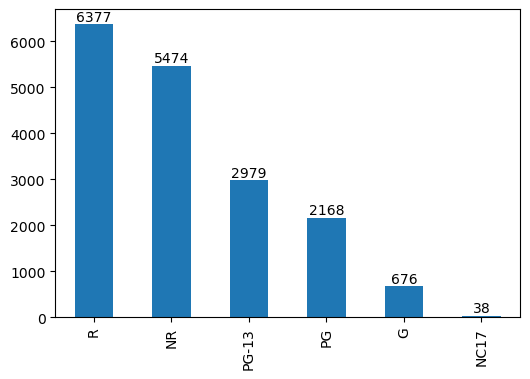

In [21]:
print(f'Content Rating Category: {movies.content_rating.unique()}')

ax = movies.content_rating.value_counts().plot(kind = 'bar', figsize = (6,4))

ax.bar_label(ax.containers[0])

In [25]:
content_rating = pd.get_dummies(movies['content_rating'])
content_rating.head(3)

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1


Audience Status: ['Spilled' 'Upright' nan]


[Text(0, 0, '9390'), Text(0, 0, '7874')]

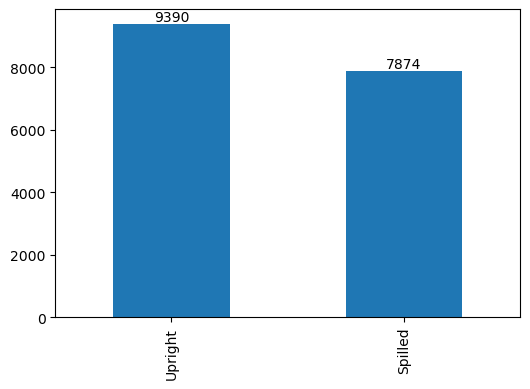

In [24]:
print(f'Audience Status: {movies.audience_status.unique()}')

ax = movies.audience_status.value_counts().plot(kind = 'bar', figsize = (6,4))

ax.bar_label(ax.containers[0])

In [26]:
audience_status = pd.DataFrame(movies['audience_status'].replace(['Spilled', 'Upright'], [0,1]))
audience_status.head(3)

,audience_status
0,0.0
1,1.0
2,0.0


In [28]:
tomatometer_status = pd.DataFrame(movies['tomatometer_status'].replace(['Rotten', 'Fresh', 'Certified-Fresh'],
                                                                      [0,1,2]))
tomatometer_status.head(3)

,tomatometer_status
0,0.0
1,2.0
2,1.0


In [32]:
movies.head(1)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [35]:
df_features = pd.concat([movies[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating',
                                'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
                                'tomatometer_rotten_critics_count']], 
                         content_rating, audience_status, tomatometer_status], axis = 1).dropna()

df_features.head(3)

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,0.0,1.0


In [36]:
df_features.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,14.765999,36.237292,20.871188,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,15.172256,51.362454,29.978900,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,23.000000,44.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

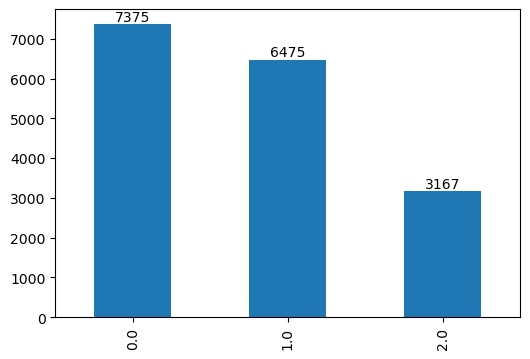

In [38]:
ax = df_features['tomatometer_status'].value_counts().plot(kind = 'bar', figsize = (6,4))
ax.bar_label(ax.containers[0])

It turns out that in our final DataFrame, we have 7375 movies classified as Rotten(encoded as 0), 6475 movies classified as 'Fresh' (encoded as 1), and only 3167 movies classified as 'Certified-Fresh' (encoded as 2). Thus, it looks like we have a class imbalance problem in this case. We will deal with this later.

In [39]:
from sklearn.model_selection import train_test_split

X = df_features.drop(['tomatometer_status'], axis = 1)
y = df_features['tomatometer_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404
